Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Syed Ragib Shariar"
COLLABORATORS = ""

---

# CSE330 Lab: Hermite Interpolation
---
Hermite Interpolation is an example of a variant of the interpolation problem, where the interpolant matches one or more **derivatives of $f$**  at each of the nodes, in addition to the function values.

## Importing the necessary libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from numpy.polynomial import Polynomial

## Creating the components for Hermite interpolation

For the case of Hermite Interpolation, we look for a polynomial that matches both $f'(x_i)$ and $f(x_i)$ at the nodes $x_i = x_0,\dots,x_n$. Say you have $n+1$ data points, $(x_0, y_0), (x_1, y_1), x_2, y_2), \dots, (x_n, y_n)$ and you happen to know the first-order derivative at all of these points, namely, $(x_0, y_0 ^\prime ), (x_1, y_1 ^\prime ), x_2, y_2 ^\prime ), \dots ,(x_n, y_n ^\prime )$. According to hermite interpolation, since there are $2n + 2$ conditions; $n+1$ for $f(x_i)$ plus $n+1$ for $f'(x_i)$; you can fit a polynomial of order $2n+1$. 

General form of a $2n+1$ degree Hermite polynomial:

$$p_{2n+1} = \sum_{k=0}^{n} \left(f(x_k)h_k(x) + f'(x_k)\hat{h}_k(x)\right), \tag{1}$$

where $h_k$ and $\hat{h}_k$ are defined using Lagrange basis functions by the following equations:

$$h_k(x) = (1-2(x-x_k)l^\prime_k(x_k))l^2_k(x_k), \tag{2}$$

and

$$\hat{h}_k(x) = (x-x_k)l^2_k(x_k), \tag{3}$$

where the Lagrange basis function being:

$$l_k(x) = \prod_{j=0, j\neq k}^{n} \frac{x-x_j}{x_k-x_j}. \tag{4}$$

**Note** that, we can rewrite Equation $(2)$ in this way,

\begin{align}
h_k(x) &= \left(1-2(x-x_k)l^\prime_k(x_k) \right)l^2_k(x_k) \\
&= \left(1 - 2xl^\prime_k(x_k) + 2x_kl^\prime_k(x_k) \right)l^2_k(x_k) \\
&= \left(1 + 2x_kl^\prime_k(x_k) - 2l'_k(x_k)x \right) l^2_k(x_k) \tag{5}
\end{align}
Replacing $l^\prime_k(x_k)$ with $m$, we get:
$$h_k(x) = (1 - 2xm + 2x_km)l^2_k(x_k). \tag{6}$$

# Tasks:

* The functions: `l(k, x)`, `h(k, x)` and `h_hat(k, x)` calculate the corresponding $l_k$, $h_k$, and $\hat{h}_k$, respectively.

* Function `l(k, x)` has already been defined for you. Your task is to complete the `h(k, x)`, `h_hat(k, x)`, and `hermit(x, y, y_prime)` functions.

* Later we will draw some plots to check if the code is working.

---

### Part 1: Calculate $l_k$
This function uses the following equation to calculate $l_k(x)$ and returns a polynomial:

$$l_k(x) = \prod_{j=0, j\neq k}^{n} \frac{x-x_j}{x_k-x_j}.$$

In [9]:
# Already written for you.

def l(k, x):
    n = len(x)
    assert (k < len(x))
    
    x_k = x[k]
    x_copy = np.delete(x, k)
    
    denominator = np.prod(x_copy - x_k)
    
    coeff = []
    
    for i in range(n):
        coeff.append(sum([np.prod(x) for x in combinations(x_copy, i)]) * (-1)**(i) / denominator)
    
    coeff.reverse()
    
    return Polynomial(coeff)

### Part 2: Calculate $h_k$
This function calculates $h_k(x)$ using the following equation:
$$h_k(x) = \left(1 + 2x_kl^\prime_k(x_k) - 2l'_k(x_k)x \right) l^2_k(x_k).$$

This equation is basically a multiplication of two polynomials.

First polynomial: $1 + 2x_kl^\prime_k(x_k) - 2l'_k(x_k)x$.

Second polynomial: $l^2_k(x_k)$.

The `coeff` variable should contain a python list of coefficient values for the **first** polynomial of the equation. These coefficient values are used to create a polynomial `p`.

In [10]:
def h(k, x):
    # initialize with None. Replace with appropriate values/function calls
    # initialize with None. Replace with appropriate values/function calls
    l_k = None
    l_k_sqr = None
    l_k_prime = None
    coeff = None
    p = None

    
    # --------------------------------------------
    # YOUR CODE HERE
    #raise NotImplementedError()
    l_k = l(k,x)
    l_k_sqr = l(k,x)*l(k,x)
    l_k_prime = l(k,x).deriv(1)
    coeff = np.array([1+2*x[k]*l_k_prime(x[k]),(-2)*l_k_prime(x[k])])
    p = Polynomial(coeff)
    # --------------------------------------------
    
    return p * l_k_sqr

In [11]:
# Test case for the h(k, x) function

x = [3, 5, 7, 9]
k = 2
h_test = h(k, [3, 5, 7, 9])
h_result = Polynomial([-2.5, 0.5]) * (l(k, x) ** 2)

assert Polynomial.has_samecoef(h_result, h_test)
assert h_result == h_test


### Part 3: Calculate $\hat{h}_k$
This function calculates $\hat{h}_k(x)$ using the following equation:

$$\hat{h}_k(x) = (x-x_k)l^2_k(x_k).$$

This equation is also a multiplication of two polynomials.

First polynomial: $x-x_k$.

Second polynomial:  $l^2_k(x_k)$.

The `coeff` variable should contain a python list of coefficient values for the **first** polynomial of the equation. These coefficient values are used to create a polynomial `p`.

In [12]:
def h_hat(k, x):
    # Initialize with none
    l_k = None
    l_k_sqr = None
    coeff = None
    p = None
    
    # --------------------------------------------
    # YOUR CODE HERE
    #raise NotImplementedError()
    l_k =l(k,x)
    l_k_sqr = l(k,x)*l(k,x)
    coeff =  np.array ([(-1)*x[k],1])
    p =Polynomial(coeff)
    # --------------------------------------------
    
    return p * l_k_sqr

In [13]:
# Test case for the h(k, x) function


x = [3, 5, 7, 9]
k = 2
h_test = h_hat(k, [3, 5, 7, 9])
h_result = Polynomial([-7, 1]) * (l(k, x) ** 2)

assert Polynomial.has_samecoef(h_result, h_test)
assert h_result == h_test

### Part 4: The Hermite Polynomial
This function uses the following equation:

$$p_{2n+1} = \sum_{k=0}^{n} \left(f(x_k)h_k(x) + f'(x_k)\hat{h}_k(x)\right).$$

The polynomial denoted by the equation is calculated by the variable `f`.

In [14]:
def hermit(x, y, y_prime):
    assert len(x) == len(y)
    assert len(y) == len(y_prime)
    
    f = Polynomial([0.0])
    # --------------------------------------------
    # YOUR CODE HERE
    #raise NotImplementedError()
    for i in range(len(x)):
        f += y[i]*h(i,x) + y_prime[i]* h_hat(i,x)  
    # --------------------------------------------
    return f

## Testing our methods by plotting graphs.

**Note:** 

* For each of the 5 plots, there will be 2 curves plotted: one being the original function, and the other being the interpolated curve. 

* The original functions are displayed in orange color, while the hermite interpolated curves are in blue.

* `x`, `y`, and `y_prime` contain $x_i$, $f(x_i)$, and $f'(x_i)$ of the given nodes of the original function $f$.

Upon calling the `hermit()` function, it returns a polynomial `f`. For example, for plot 1, it is called `f3`.

In general, a polynomial may look like the following: $f = 1 + 2x + 3x^2$. Next, we pass in a number of $x$ values to the polynomial by calling the `.linspace()` function on the polynomial object using `f.linspace()`. This function outputs a tuple, which is stored in a variable called `data`. First element of `data` contains a 1D numpy array of $x_i$ values generated by `linspace()`, and the second element of `data` contains a 1D numpy array of the corresponding $y_i$ values outputted by our example polynomial:
$f = 1 + 2x + 3x^2$. 

Using `test_x`, we generate a range of $x_i$ values to plot the original function, and `test_y` contains the corresponding $y_i$ values of the original function. For the first plot, our original function is the *sine curve*.

For all the plots:

`plt.plot(test_x, test_y)` plots the original function.

`plt.plot(data[0], data[1])` plots the interpolated polynomial.

In [15]:
pi      = np.pi
x       = np.array([0.0, pi/2.0,  pi, 3.0*pi/2.0])
y       = np.array([0.0,    1.0, 0.0,       -1.0])
y_prime = np.array([1.0,    0.0, 1.0,        0.0])

**Plot 1:** trying to interpolate a sine curve (`np.sin()`) using first 2 nodes in `x` and `y`, and their corresponding derivative in `y_prime`.

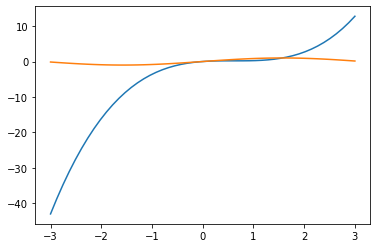

In [16]:
n      = 1
f3     = hermit(x[:(n+1)], y[:(n+1)], y_prime[:(n+1)])
data   = f3.linspace(n=50, domain=[-3, 3])
test_x = np.linspace(-3, 3, 50, endpoint=True)
test_y = np.sin(test_x)

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()
np.testing.assert_allclose(data[1][20:32], test_y[20:32], atol=0.7, rtol=1.4)

**Plot 2:** trying to interpolate a sine curve (`np.sin()`) using first 3 nodes in `x` and `y` and their corresponding derivative in `y_prime`.

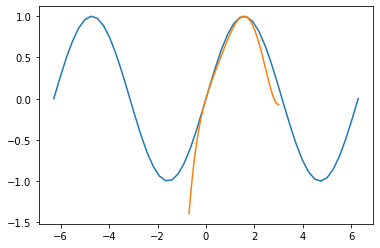

In [17]:
n      = 2
f5     = hermit(x[:(n+1)], y[:(n+1)], y_prime[:(n+1)])
data   = f5.linspace(n=50, domain=[-0.7, 3])
test_x = np.linspace(-2*pi, 2*pi, 50, endpoint=True)
test_y = np.sin(test_x)

plt.plot(test_x, test_y) # 25-
plt.plot(data[0], data[1]) # 10-33
plt.show()


data = f5.linspace(n=50, domain=[0, 3])
test_x = np.linspace(0, 3, 50, endpoint=True)
test_y = np.sin(test_x)
np.testing.assert_allclose(data[1], test_y, atol=0.5, rtol=1.7)

**Plot 3:** trying to interpolate a sine curve (`np.sin()`) using first 4 nodes in `x` and `y` and their corresponding derivative in `y_prime`.

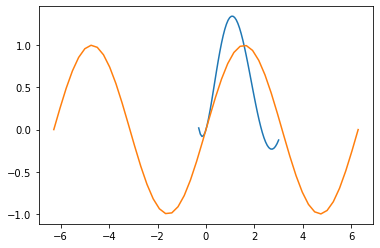

In [18]:
n      = 3
f7     = hermit(x[:(n+1)], y[:(n+1)], y_prime[:(n+1)])
data   = f7.linspace(n=50, domain=[-0.3, 3])
test_x = np.linspace(-2*pi, 2*pi, 50, endpoint=True)
test_y = np.sin(test_x)

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()


data = f7.linspace(n=50, domain=[0, 3])
test_x = np.linspace(0, 3, 50, endpoint=True)
test_y = np.sin(test_x)
np.testing.assert_allclose(data[1], test_y, atol=0.8, rtol=1.9)

**Plot 4:** trying to interpolate an exponential curve (`np.exp()`) using all nodes in `x` and `y` and their corresponding derivatives in `y_prime`.

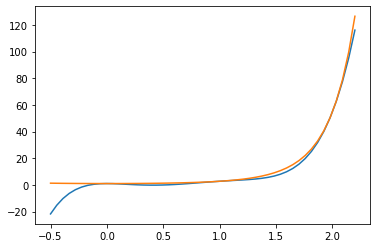

In [19]:
#defining new set of given node information: x, y and y'
x       = np.array([0.0, 1.0,          2.0       ])
y       = np.array([1.0, 2.71828183,  54.59815003])
y_prime = np.array([0.0, 5.43656366, 218.39260013])


f7      = hermit( x, y, y_prime)
data    = f7.linspace(n=50, domain=[-0.5, 2.2])
test_x  = np.linspace(-0.5, 2.2, 50, endpoint=True)
test_y  = np.exp(test_x**2)

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()


np.testing.assert_allclose(test_y[27:47], data[1][27:47], atol=3, rtol=0.4)


**Plot 5:** trying to interpolate $y = (x-3)^2 + 1$ using all nodes in `x` and `y` and their corresponding derivatives in `y_prime`.

For this plot you might be able to see only one curve due to the two curves overlapping. This means that our polynomial is accurately interpolating the original function.


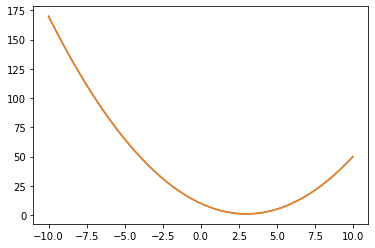

In [20]:
#defining new set of given node information: x, y and y'
x       = np.array([1.0, 3.0, 5.0])
y       = np.array([5.0, 1.0, 5.0])
y_prime = np.array([-4.0, 0.0, 4.0])

f7      = hermit( x, y, y_prime)
data    = f7.linspace(n=50, domain=[-10, 10])
test_x  = np.linspace(-10, 10, 50, endpoint=True)
test_y  = (test_x-3)**2 + 1

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()

np.testing.assert_allclose(test_y, data[1], atol=0.1, rtol=0.1)